In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

In [5]:
# Load the CSV file to examine its content
file_path = pathlib.Path('~/Developer/code/patient-note-alignment/reports/data/task_experiments.csv').expanduser()
df = pd.read_csv(file_path, delimiter=',')

# Display the first few rows and the column names to understand the structure
df.head(), df.columns

(            Start Time Duration                            Run ID  \
 0  2024-09-29 10:41:04  46.8min  a13349b2ff6b43e480029419f4b0d9ad   
 1  2024-09-30 16:30:02   7.9min  472e76dbaccd459f8c24c94084331f9e   
 2  2024-09-29 21:46:02     3.3h  9857e07af65e4bb892974d4f60c70f4d   
 3  2024-09-29 09:00:39  21.5min  b07a308e576547db8298758ac849dcdc   
 4  2024-09-30 13:39:53  22.6min  21419ba8ab7b45828a153b24abac48ef   
 
                                                 Name Source Type  \
 0           Meta-Llama-3.1-70B-instruct-loft-50shots       LOCAL   
 1  Meta-Llama-3.1-70B-instruct-dense-shots-no-it-...       LOCAL   
 2          Meta-Llama-3.1-70B-instruct-binary-5shots       LOCAL   
 3            Meta-Llama-3.1-70B-instruct-loft-5shots       LOCAL   
 4  Meta-Llama-3.1-70B-instruct-dense-shots-no-it-...       LOCAL   
 
                 Source Name User    Status  \
 0  experiments/benchmark.py  amo  FINISHED   
 1  experiments/benchmark.py  amo  FINISHED   
 2  experiments/bench

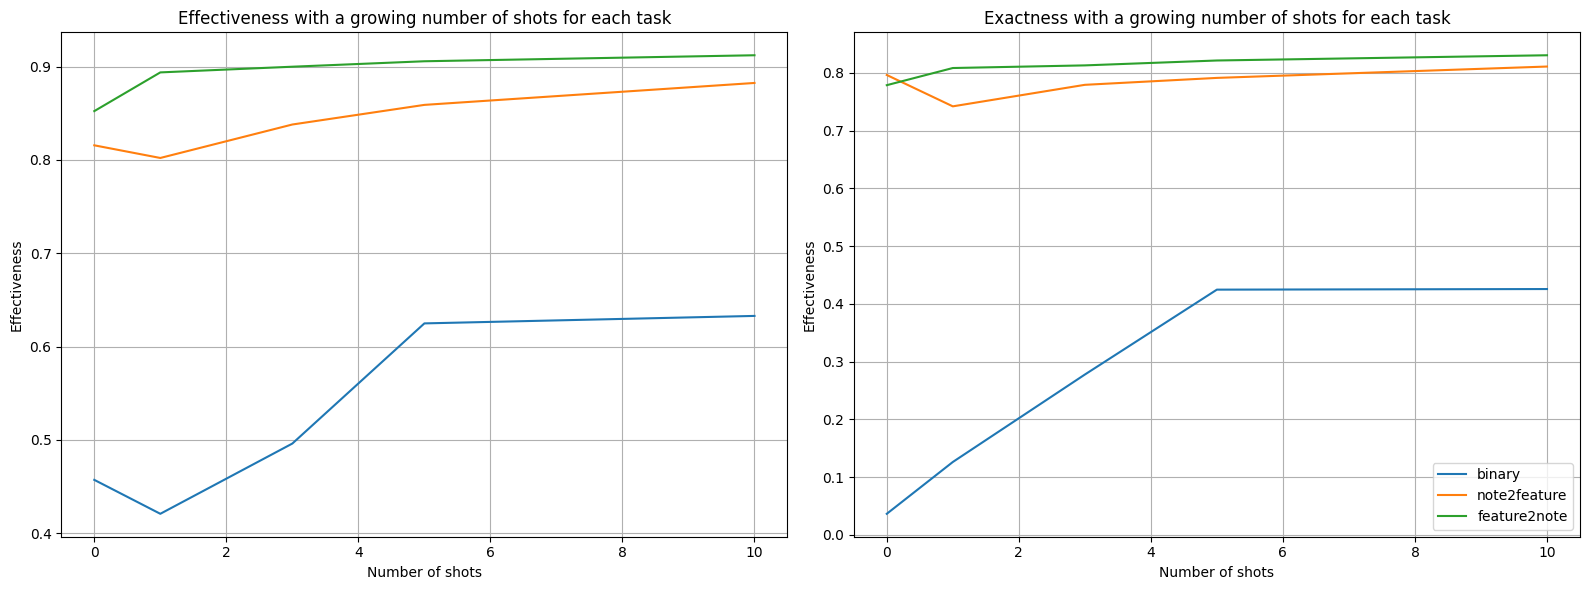

In [19]:
agg_df1 = df.groupby(['num_shots', 'prompt_name'])['f1_score/mean'].agg(['mean', 'min', 'max']).reset_index()
agg_df2 = df.groupby(['num_shots', 'prompt_name'])['exact_match/mean'].agg(['mean', 'min', 'max']).reset_index()

prompt_lookup = {
    "binary" : "binary",
    "loft": "feature2note",
    "dense-shots-no-it": "note2feature"
}

agg_df1 = agg_df1.loc[(agg_df1['num_shots'] <= 10)]
agg_df2 = agg_df2.loc[(agg_df2['num_shots'] <= 10)]

# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the first metric (f1_score/mean) on the first subplot
for prompt_name in agg_df1['prompt_name'].unique():
    prompt = prompt_lookup[prompt_name]
    subset = agg_df1[agg_df1['prompt_name'] == prompt_name]
    axes[0].plot(subset['num_shots'], subset['mean'], label=prompt)

axes[0].set_xlabel('Number of shots')
axes[0].set_ylabel('Effectiveness')
axes[0].set_title('Effectiveness with a growing number of shots for each task')
# axes[0].axhline(y=0.873, color='red', linestyle='--', label='GPT-4o @ Shot 0')
axes[0].grid(True)

# Plotting the second metric (another_metric/mean) on the second subplot
for prompt_name in agg_df2['prompt_name'].unique():
    prompt = prompt_lookup[prompt_name]
    subset2 = agg_df2[agg_df2['prompt_name'] == prompt_name]
    axes[1].plot(subset2['num_shots'], subset2['mean'], label=prompt)

axes[1].set_xlabel('Number of shots')
axes[1].set_ylabel('Effectiveness')
axes[1].set_title('Exactness with a growing number of shots for each task')
# axes[1].axhline(y=0.794, color='red', linestyle='--', label='GPT-4o @ Zero-shot')
axes[1].legend(title=None)
axes[1].grid(True)

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

In [12]:
agg_df1.dtypes

num_shots        int64
prompt_name     object
mean           float64
min            float64
max            float64
dtype: object

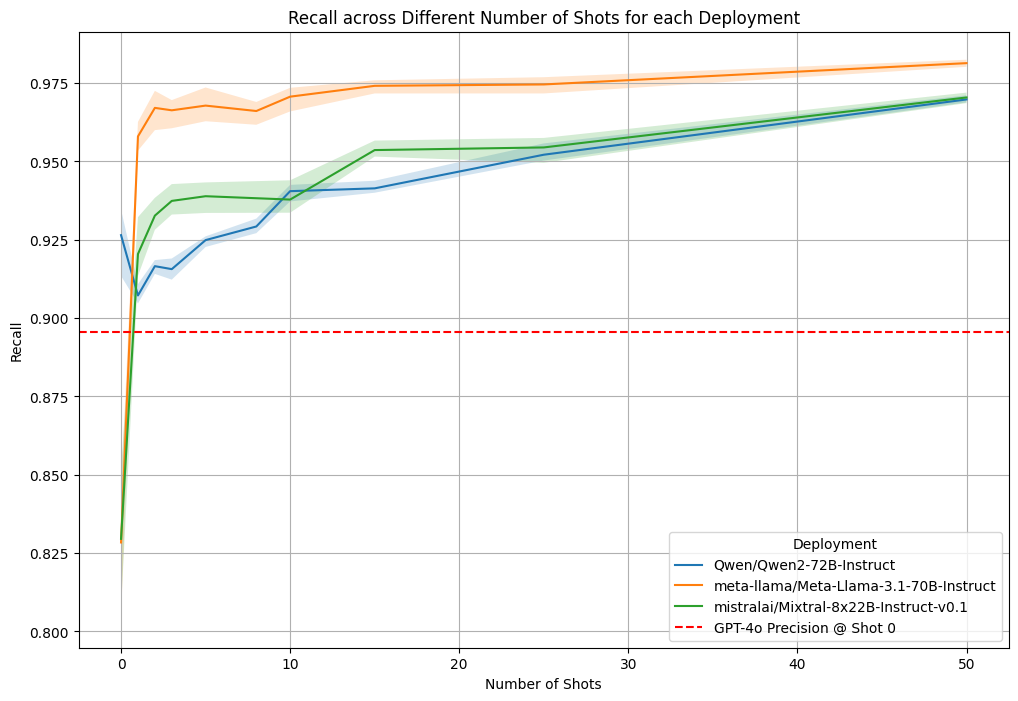

In [24]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['recall/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.8956, color='red', linestyle='--', label='GPT-4o Precision @ Shot 0')

plt.xlabel('Number of Shots')
plt.ylabel('Recall')
plt.title('Recall across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

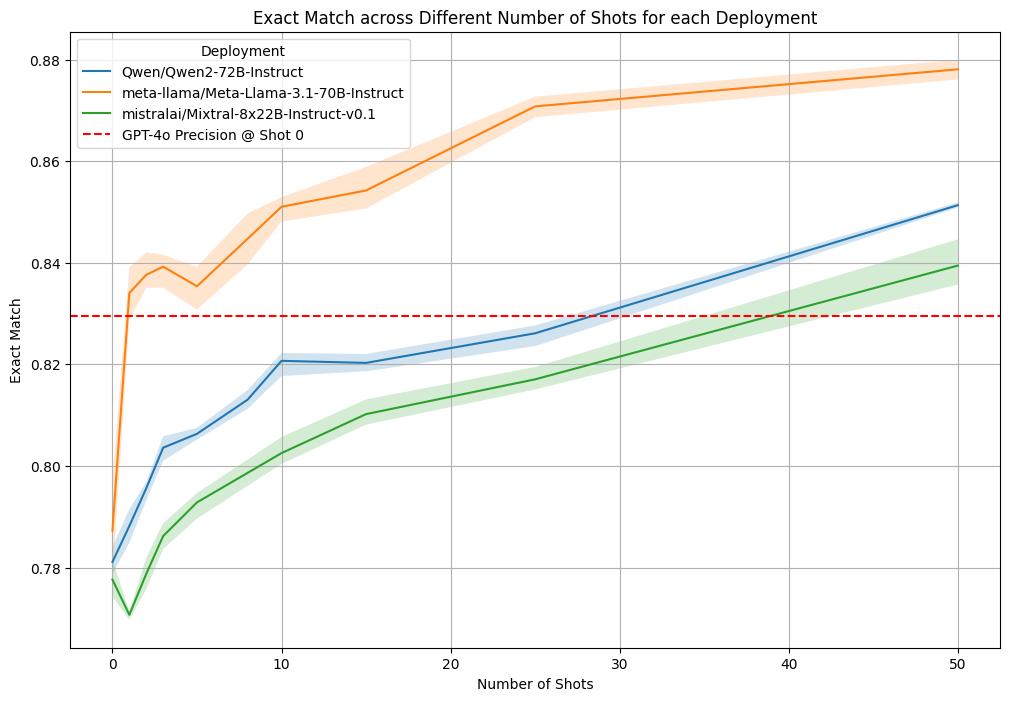

In [25]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['exact_match/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.8296, color='red', linestyle='--', label='GPT-4o Precision @ Shot 0')

plt.xlabel('Number of Shots')
plt.ylabel('Exact Match')
plt.title('Exact Match across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

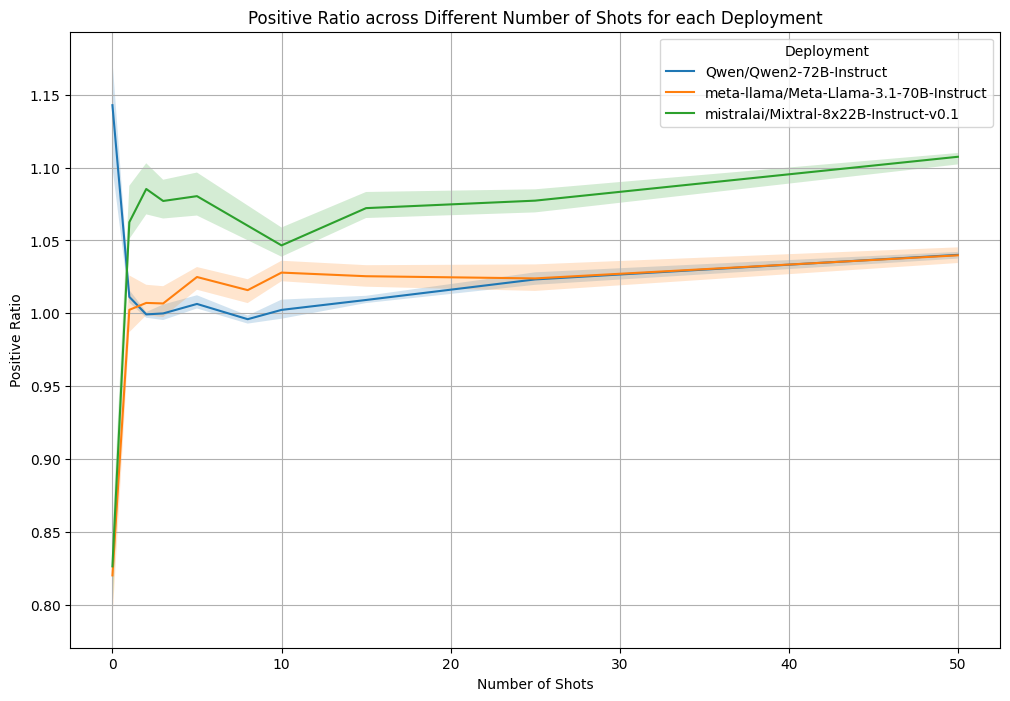

In [26]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['positive_ratio/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of Shots')
plt.ylabel('Positive Ratio')
plt.title('Positive Ratio across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

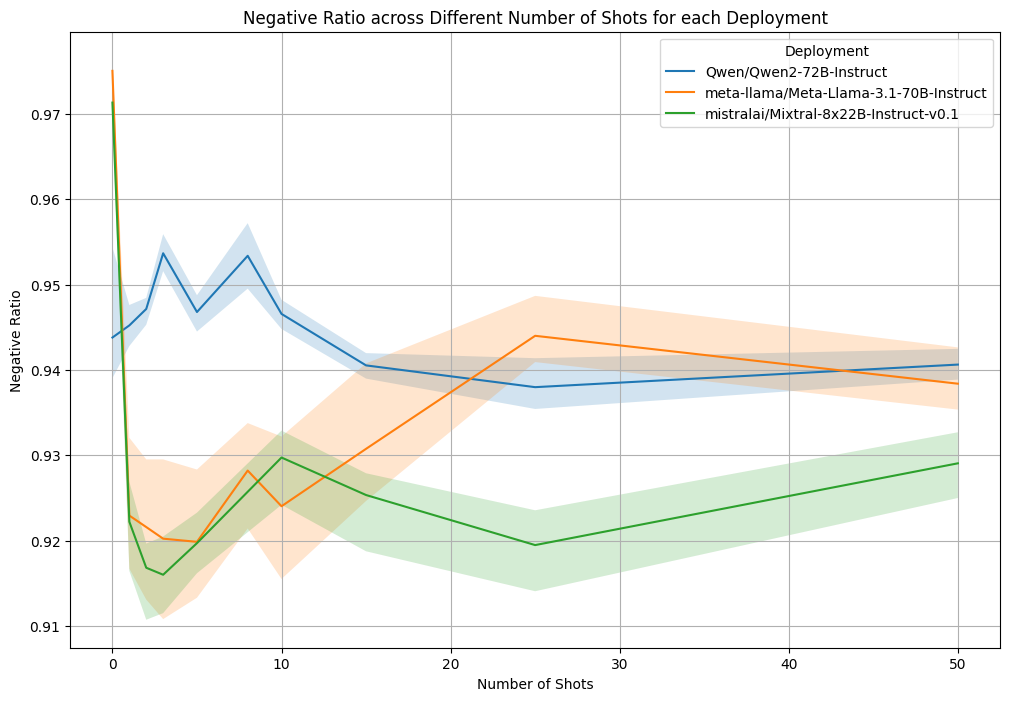

In [27]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['negative_ratio/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of Shots')
plt.ylabel('Negative Ratio')
plt.title('Negative Ratio across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()